In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set device variable

In [3]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(device)

# Prepare Dataset objects

In [5]:
data_path = './'

cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

n_out = 10

# Prepare Dataloader objects

In [6]:
#kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available()else {}

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)#,  **kwargs)

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,shuffle=False)#, **kwargs)

# Build a CNN Model

**Convolution** is defined for a 2D image as the scalar product of a weight matrix, the kernel, with every neighborhood in the input.

An intuition behind **Convolution**
> - If we want to recognize patterns corresponding to objects, like an airplane in the sky, we will likely need to look at how nearby pixels are arranged, and we will be less interested in how pixels that are far from each other appear in combination. In order to translate this intuition into mathematical form, we could compute the weighted sum of a pixel with its immediate neighbors, rather than with all other pixels in the image.

Convolution is a local, translation-invariant linear operation on the image.

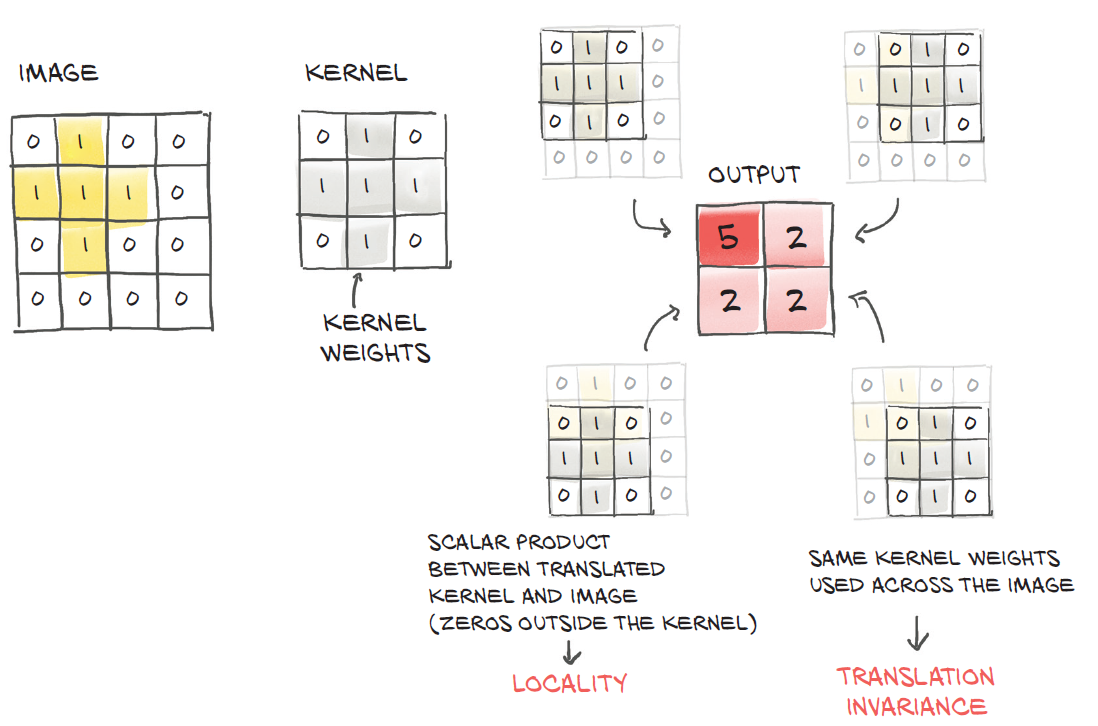

The **torch.nn** module provides convolutions for 1, 2, and 3 dimensions: 
> - nn.Conv1d for time series, 
> - nn.Conv2d for images, and 
> - nn.Conv3d for volumes or videos.

**nn.Conv2d expects a B × C × H × W shaped tensor as input.** The basic arguments of **nn.Conv2d** are
> - the number of input features (or channels), 
> - the number of output features, and 
> - the size of the kernel.

For instance, for our first convolutional module, we’ll have 3 input features per pixel (the RGB channels) and an arbitrary number of channels in the output—say, 16. 

**The more channels in the output image, the more the capacity of the network. We need the channels to be able to detect many different types of features.**

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Flatten(), 
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, n_out)
)

# model.to(device)

# Start Training

In [ ]:
learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    model.train(True)
    for imgs, labels in train_loader:
        #imgs, labels = imgs.to(device), labels.to(device)
        
        outputs = model(imgs)   # important:  nn.Conv2d expects a B × C × H × W shaped tensor as input
        train_loss = loss_fn(outputs, labels)
  
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            #imgs, labels = imgs.to(device), labels.to(device)
            
            outputs = model(imgs)
            val_loss = loss_fn(outputs, labels)
            
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
    print("Epoch: %d, train_loss: %f, val_loss: %f, val_accuracy: %f" % (epoch, float(train_loss), float(val_loss), (correct / total)))

In [ ]:
for epoch in range(n_epochs):
    model.train(True)
    for imgs, labels in train_loader:
        outputs = model(imgs)     # Step 1
        train_loss = loss_fn(outputs, labels)   # Step 2
  
        optimizer.zero_grad()   # Step 3
        train_loss.backward()   # Step 4
        optimizer.step()   # Step 5
    
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            outputs = model(imgs)
            val_loss = loss_fn(outputs, labels)
            
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
    print("Epoch: %d, train_loss: %f, val_loss: %f, val_accuracy: %f" % (epoch, float(train_loss), float(val_loss), (correct / total)))